<a href="https://colab.research.google.com/github/Dana1402/Detection_NN/blob/main/2_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.7   2         auto mode
  1            /usr/bin/python3.6   1         manual mode
  2            /usr/bin/python3.7   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.6 to provide /usr/bin/python3 (python3) in manual mode


In [ ]:
!python3 --version

Python 3.6.9


In [ ]:
# !pip install tensorflow==1.15.5
import tensorflow as tf
print(tf.__version__)

1.15.5


In [ ]:
# pip install tf_slim

In [ ]:
# !pip install pycocotools

In [ ]:
# pip install lvis

In [ ]:
# !pip install ipykernel

In [ ]:
# !pip install scipy

In [ ]:
# pip install tensorflow.io

In [ ]:
# pip install tf-models-official

In [ ]:
# !sudo apt-get install python3-pip

In [ ]:
# !python -m pip install --upgrade pip

In [ ]:
# !pip3 install absl-py

In [ ]:
# !pip install --upgrade google-api-python-client

Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating working directory

In [ ]:
%cd "/content/drive/My Drive/tf_od_demo"

/content/drive/My Drive/tf_od_demo


Istalling object detection library

In [ ]:
if True:
  
    !git clone https://github.com/tensorflow/models
    !cd models/research && protoc object_detection/protos/*.proto --python_out=.
    !cd models/research && export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim && python object_detection/builders/model_builder_test.py

fatal: destination path 'models' already exists and is not an empty directory.
Traceback (most recent call last):
  File "object_detection/builders/model_builder_test.py", line 20, in <module>
    from object_detection.builders import model_builder
  File "/content/drive/MyDrive/tf_od_demo/models/research/object_detection/builders/model_builder.py", line 37, in <module>
    from object_detection.meta_architectures import deepmac_meta_arch
  File "/content/drive/MyDrive/tf_od_demo/models/research/object_detection/meta_architectures/deepmac_meta_arch.py", line 28, in <module>
    import tensorflow_io as tfio  # pylint:disable=g-import-not-at-top
ModuleNotFoundError: No module named 'tensorflow_io'


In [ ]:
# pip install tensorflow-object-detection-api

In [ ]:
import pandas as pd
import os
from PIL import Image

import tensorflow as tf

import sys
sys.path.insert(0, 'models/research')

from object_detection.utils import dataset_util
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
def create_tf_example(example):
  
    img_fpath = os.path.join('my_dataset_2_classes', example.id)
    img = Image.open(img_fpath)
    height = img.size[1]
    width = img.size[0]
    filename = str.encode(example.id)
    with open(img_fpath, mode='rb') as f:
        encoded_image_data = f.read()
    image_format = b'jpeg'

    # List of normalized left x coordinates in bounding box (1 per box)
    xmins = [example.xmin1 / float(width), example.xmin2 / float(width)] 
    # List of normalized right x coordinates in bounding box # (1 per box)
    xmaxs = [example.xmax1 / float(width), example.xmax2 / float(width)] 
    # List of normalized top y coordinates in bounding box (1 per box)
    ymins = [example.ymin1 / float(height), example.ymin2 / float(height)] 
    # List of normalized bottom y coordinates in bounding box # (1 per box)
    ymaxs = [example.ymax1 / float(height), example.ymax2 / float(height)] 
    # List of string class name of bounding box (1 per box)
    classes_text = [b'Santa', b'Car']
    # List of integer class id of bounding box (1 per box)
    classes = [1, 2]

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_image_data),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

In [ ]:
annot = pd.read_csv('/content/drive/MyDrive/tf_od_demo/my_dataset_2_classes/annot.csv')
annot.head()

,id,xmin1,ymin1,xmax1,ymax1,xmin2,ymin2,xmax2,ymax2
0,1.jpg,64,116,117,206,195,170,273,236
1,2.jpg,170,356,287,560,446,299,566,443
2,3.jpg,104,251,209,443,365,323,506,443
3,4.jpg,152,173,242,344,347,317,488,434
4,5.jpg,92,206,203,401,362,320,512,416


Создание TFRecord

In [ ]:
writer = tf.io.TFRecordWriter('my_dataset_2_classes/train_data.record')

In [ ]:
for idx, row in annot.iterrows():
    tf_example = create_tf_example(row)
    writer.write(tf_example.SerializeToString())

writer.close()

Dowloading prelearned model

In [ ]:
if True:
    !wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2018_01_28.tar.gz
    !tar -xzf ssd_mobilenet_v1_coco_2018_01_28.tar.gz

--2022-06-08 14:32:54--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.136.128, 2607:f8b0:4001:c34::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.136.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76541073 (73M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_coco_2018_01_28.tar.gz’

ssd_mobilenet_v1_co 100%[===================>]  73.00M  36.0MB/s    in 2.0s    

2022-06-08 14:32:56 (36.0 MB/s) - ‘ssd_mobilenet_v1_coco_2018_01_28.tar.gz’ saved [76541073/76541073]



Start learning our model

In [ ]:
# pip uninstall opencv-python-headless==4.5.5.64

In [ ]:
# pip install opencv-python-headless==4.1.2.30

In [ ]:
# !pip install tensorflow==1.15.5 --ignore-installed

In [ ]:
%%time

if True:
    # Delete output directory
    !rm -rf my_dataset_car/output

!export PYTHONPATH=$PYTHONPATH:models/research:models/research/slim ; python models/research/object_detection/model_main.py \
    --pipeline_config_path=my_dataset_2_classes/pipeline.config \
    --model_dir=my_dataset_2_classes/output \
    --num_train_steps=10000 \
    --alsologtostderr

W0715 11:42:28.650747 139745360066432 model_lib.py:839] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 10000
I0715 11:42:28.651091 139745360066432 config_util.py:552] Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0715 11:42:28.651221 139745360066432 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0715 11:42:28.651323 139745360066432 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0715 11:42:28.651427 139745360066432 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0715 11:42:28.651609 139745360066432 model_lib.py:855] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to

Freezing model

In [ ]:
!export PYTHONPATH=$PYTHONPATH:models/research:models/research/slim ; python models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=my_dataset_2_classes/pipeline.config \
    --trained_checkpoint_prefix=my_dataset_2_classes/output/model.ckpt-10000 \
    --output_directory=my_dataset_2_classes/output/frozen/

Instructions for updating:
Please use `layer.__call__` method instead.
W0715 12:52:50.775734 140074099185536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0715 12:52:52.581835 140074099185536 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0715 12:52:52.629311 140074099185536 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0715 12:52:52.674393 140074099185536 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

**Testing model**

Uploading name of classes and their IDs

In [ ]:
PATH_TO_LABELS = 'my_dataset_2_classes/labels_map.pbtxt'

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

Uploading Freezing model

In [ ]:
PATH_TO_FROZEN_GRAPH = 'my_dataset_2_classes/output/frozen/frozen_inference_graph.pb'

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [ ]:
def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[1], image.shape[2])
                detection_masks_reframed = tf.cast(tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict, feed_dict={image_tensor: image})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[ 'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

In [ ]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
image_np = imageio.imread('/content/drive/MyDrive/tf_od_demo/my_dataset_2_classes/test.jpg')
image_np_expanded = np.expand_dims(image_np, axis=0)

output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)

In [ ]:
output_dict

{'detection_boxes': array([[0.35091418, 0.01476926, 0.7322404 , 0.2875825 ],
        [0.30201173, 0.58950967, 0.53309613, 0.79558295],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.      

Visualization

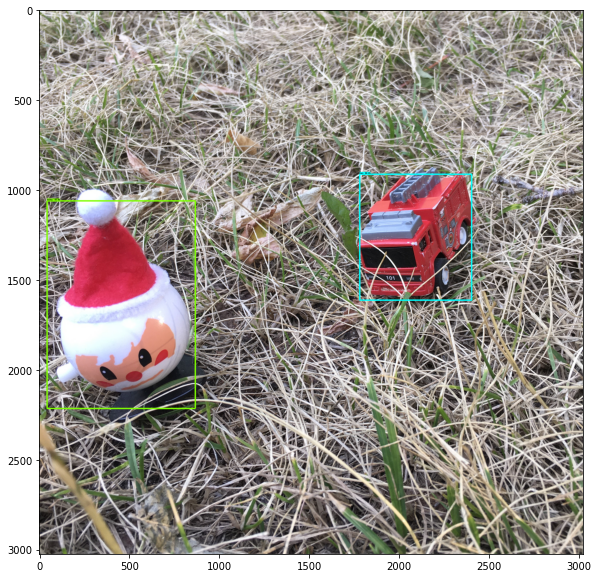

In [ ]:
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks'),
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.7)

%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(image_np)